# Exploratory Data Analysis

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly
# import whatever other EDA things we need

Let's start by reading the TSA throughput data for the year 2023 and looking at some basic numerical summaries

In [12]:
tsa_data = pd.read_csv("../data/tsa-throughput-data-2023-complete.csv")

In [13]:
print('Rows:', len(tsa_data), 'Columns:', tsa_data.shape[1])
mem = tsa_data.memory_usage(deep=True).sum() / (1024**2)
print(f'Memory MB: {mem:.2f}')
display(tsa_data.head(3))
display(tsa_data.tail(3))
display(tsa_data.describe(include='all').T)

Rows: 2796468 Columns: 8
Memory MB: 348.44


,Date,Hour,Airport Code,Airport Name,City,State,Checkpoint,Total Passenger Throughput
0,2023-01-01,00:00,ANC,Ted Stevens Anchorage International,Anchorage,AK,South Checkpoint,170
1,2023-01-01,00:00,ATL,Hartsfield Atlanta International,Atlanta,GA,Main Checkpoint,18
2,2023-01-01,00:00,BOS,Logan International,East Boston,MA,C2,1


,Date,Hour,Airport Code,Airport Name,City,State,Checkpoint,Total Passenger Throughput
2796465,2023-12-31,23:00,SLC,Salt Lake City International,Salt Lake City,UT,Main,180
2796466,2023-12-31,23:00,SMF,Sacramento International,Sacramento,CA,Central B,103
2796467,2023-12-31,23:00,SMF,Sacramento International,Sacramento,CA,Terminal A,382


,count,unique,top,freq
Date,2796468,365,2023-08-07,15850
Hour,2796468,24,14:00,162187
Airport Code,2796468,425,DFW,96463
Airport Name,2796468,665,Los Angeles International,83509
City,2796468,411,Chicago,103619
State,2796468,55,CA,313813
Checkpoint,2796468,508,Main Checkpoint,97693
Total Passenger Throughput,2796468,3343,0,64115


This dataset has 2.8 million rows of data for each TSA checkpoint on every day and hour.

It looks like there are 365 unique days and 24 unique hours, as expected. The date with the most entries is August 7th, 2023, which *may* indicate that there was a larger traveler throughput on this day.

The airport with the most entries on this list is Dallas-Fort Worth International airport, and the state with the most entries is California (likely because it has the most airports out of all states on the list).

Finally, note that the most common passenger throughput value is 0. This is expected since passenger throughput is a **count** which is typically expected to follow a Poisson distribution.

## Data Types

Before we start exploring this data, note that every column is actually a string type

In [14]:
tsa_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2796468 entries, 0 to 2796467
Data columns (total 8 columns):
 #   Column                      Dtype
---  ------                      -----
 0   Date                        str  
 1   Hour                        str  
 2   Airport Code                str  
 3   Airport Name                str  
 4   City                        str  
 5   State                       str  
 6   Checkpoint                  str  
 7   Total Passenger Throughput  str  
dtypes: str(8)
memory usage: 348.4 MB


This is not good for the `Date` and `Hour` columns, which are times, and the `Total Passenger Throughput` column, which is a number. To fix this, we convert the date and time to a `datetime` data type and the total passenger throughput to an `int` data type.

In [15]:
tsa_data['DateTime'] = pd.to_datetime(tsa_data['Date'].astype(str) + ' ' + tsa_data['Hour'].astype(str))
tsa_data['Total Passenger Throughput'] = tsa_data['Total Passenger Throughput'].str.replace(',', '').astype(int)

In [16]:
tsa_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 2796468 entries, 0 to 2796467
Data columns (total 9 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   Date                        str           
 1   Hour                        str           
 2   Airport Code                str           
 3   Airport Name                str           
 4   City                        str           
 5   State                       str           
 6   Checkpoint                  str           
 7   Total Passenger Throughput  int64         
 8   DateTime                    datetime64[us]
dtypes: datetime64[us](1), int64(1), str(7)
memory usage: 362.7 MB


Let's also look at whether this data set contains any duplicate rows (which we expect it not to)

In [17]:
tsa_data[tsa_data.duplicated(keep=False)]

,Date,Hour,Airport Code,Airport Name,City,State,Checkpoint,Total Passenger Throughput,DateTime
1629349,2023-08-06,00:00,ABQ,Albuquerque International Sunport,Albuquerque,NM,Checkpoint for A/B Gates,4,2023-08-06 00:00:00
1629350,2023-08-06,00:00,ABQ,Albuquerque International Sunport,Albuquerque,NM,Checkpoint for A/B Gates,4,2023-08-06 00:00:00
1629351,2023-08-06,00:00,ANC,Ted Stevens Anchorage International,Anchorage,AK,South Checkpoint,367,2023-08-06 00:00:00
1629352,2023-08-06,00:00,ANC,Ted Stevens Anchorage International,Anchorage,AK,South Checkpoint,367,2023-08-06 00:00:00
1629353,2023-08-06,00:00,ATL,Hartsfield - Jackson Atlanta International,Atlanta,GA,Main Checkpoint,45,2023-08-06 00:00:00
...,...,...,...,...,...,...,...,...,...
1737350,2023-08-12,23:00,SMF,Sacramento International,Sacramento,CA,Terminal A,37,2023-08-12 23:00:00
1737351,2023-08-12,23:00,SMF,Sacramento International,Sacramento,CA,Central B,153,2023-08-12 23:00:00
1737352,2023-08-12,23:00,SMF,Sacramento International,Sacramento,CA,Terminal A,37,2023-08-12 23:00:00
1737353,2023-08-12,23:00,TPA,Tampa International,Tampa,FL,TPA E,2,2023-08-12 23:00:00


It looks like the week from August 6th-12th was accidentally counted twice. Let's remove all of these duplicate rows from the data set.

In [18]:
tsa_data = tsa_data.drop_duplicates()

In [19]:
tsa_data["Total Passenger Throughput"].value_counts()

Total Passenger Throughput
0       63019
1       23679
2       23313
3       20888
4       20311
        ...  
3766        1
3682        1
3392        1
3404        1
3267        1
Name: count, Length: 3343, dtype: int64

## Interesting Observations

The summary above suggests that Dallas-Fort Worth International airport has the most entries in `Airport Code` but then Los Angeles International has the most entries in `Airport Name`. To see why, we look at the value counts for these columns:

In [20]:
tsa_data[tsa_data['Airport Code'] == 'DFW']['Airport Name'].value_counts()

Airport Name
Dallas/Fort Worth International    52086
Dallas-Fort Worth International    42525
Name: count, dtype: int64

In [21]:
tsa_data[tsa_data['Airport Code'] == 'LAX']['Airport Name'].value_counts()

Airport Name
Los Angeles International    81864
Name: count, dtype: int64

DFW Airport has two different names in the dataset! This tells us that we should probably avoid using `Airport Name` as a feature and stick to `Airport Code` instead.

We also see that Chicago shows up the most as `City` even though DFW and LAX are the most common airports. Let's see why:

In [22]:
tsa_data[tsa_data['City'] == 'Los Angeles']['Airport Name'].value_counts()

Airport Name
Los Angeles International    81864
Name: count, dtype: int64

In [23]:
tsa_data[tsa_data['City'] == 'Dallas']['Airport Name'].value_counts()

Airport Name
Dallas Love Field    7010
Name: count, dtype: int64

In [24]:
tsa_data[tsa_data['City'] == 'Chicago']['Airport Name'].value_counts()

Airport Name
Chicago-OHare International     51959
Chicago O'Hare International    40924
Chicago Midway                   4871
Chicago Midway International     3875
Name: count, dtype: int64

It looks like Chicago O'Hare has the same naming problem as DFW. Otherwise, it would have been the most common `Airport Name`. Also notice that DFW does not show up when the city is set to Dallas.

In [25]:
tsa_data[tsa_data['Airport Code'] == 'DFW']['City'].value_counts()

City
DFW Airport    94611
Name: count, dtype: int64

It looks like DFW Airport counts as its own city. Therefore, we need to be careful trusting the results of the `City` column if we use it as a feature.

## TSA Checkpoints

For our data analysis, we will be combining all the checkpoints in each airport together, since we don't particularly care which TSA checkpoint people entered through to call an airport busy.

But first, let's take a look at the checkpoints from a single airport and compare some of their results. We will take Chicago-O'Hare airport as an example.

In [26]:
tsa_data[tsa_data['Airport Code'] == 'ORD']['Checkpoint'].value_counts()

Checkpoint
10     8759
6A     8484
4B     8161
7A     7451
1      7254
5      6913
2      6335
7      6224
9      6197
8      6195
10A    6136
6      5896
3A     5852
11     3026
Name: count, dtype: int64

This list contains 14 different checkpoints, ordered by how many entries each one gets. The one with the most entries is Checkpoint 10. According to the [Chicago O'Hare website](https://www.flychicago.com/ohare/myflight/security/Pages/TSA.aspx), checkpoint 10 is in Terminal 5, which is infamously considered to be the busiest terminal in ORD. So this matches our expectations.

Let's plot all of the throughput data for checkpoint 10

In [27]:
ord10_df = tsa_data[(tsa_data['Airport Code'] == 'ORD') & (tsa_data['Checkpoint'] == '10')]

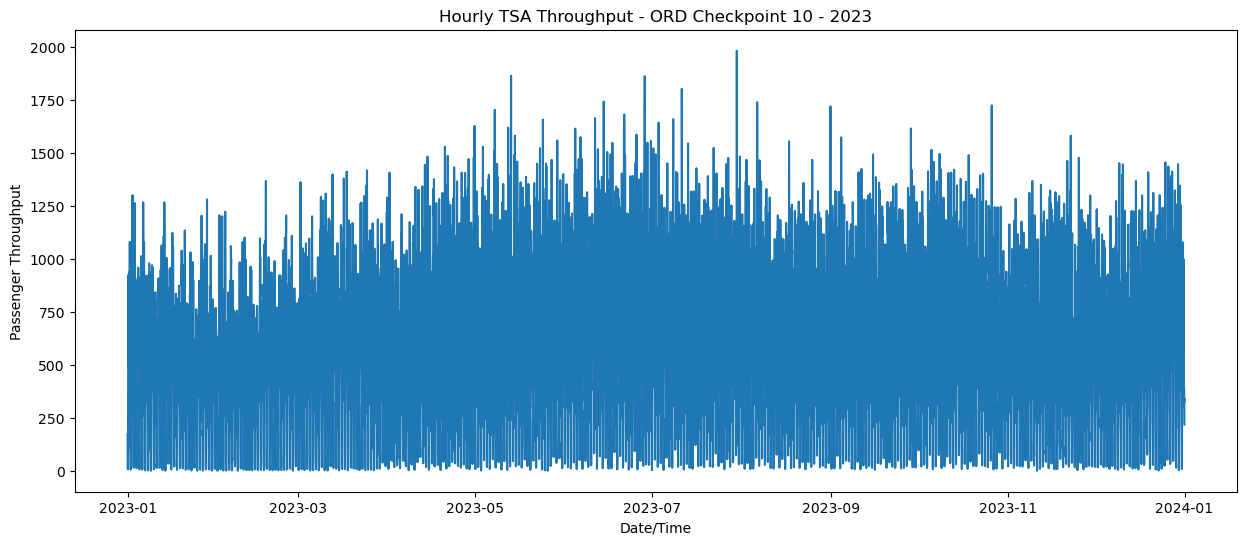

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(ord10_df['DateTime'], ord10_df['Total Passenger Throughput'])
plt.title('Hourly TSA Throughput - ORD Checkpoint 10 - 2023')
plt.xlabel('Date/Time')
plt.ylabel('Passenger Throughput')
plt.show()

This data is messy, so its hard to see any trends. Let's sum over each day and plot daily totals instead.

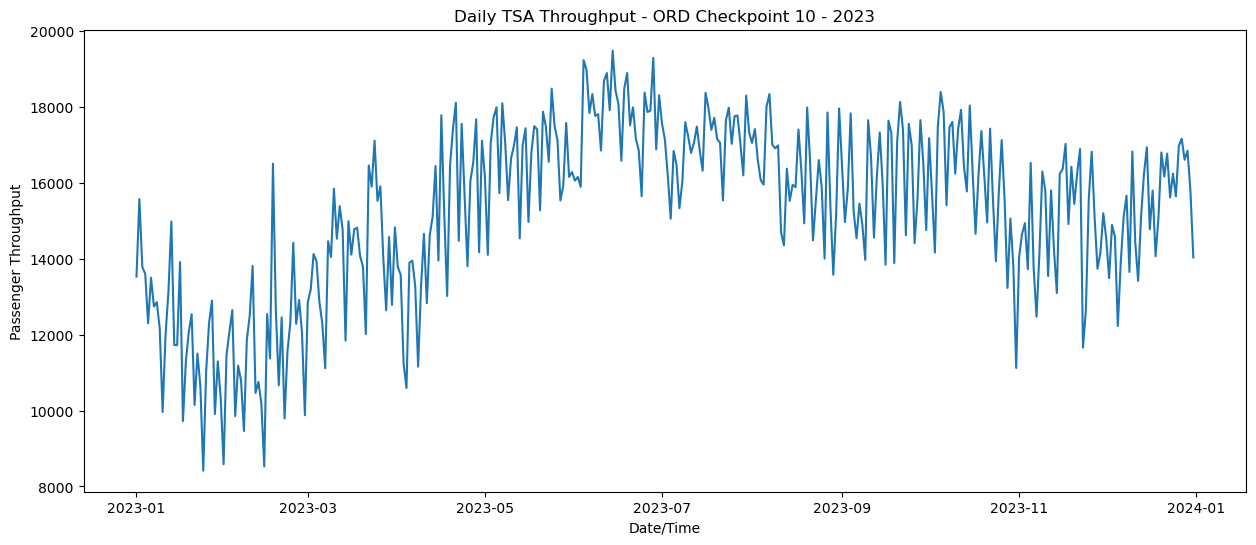

In [29]:
ord10_daily = ord10_df.groupby(pd.Grouper(key='DateTime', freq='D'))['Total Passenger Throughput'].sum()
plt.figure(figsize=(15, 6))
plt.plot(ord10_daily.index, ord10_daily)
plt.title('Daily TSA Throughput - ORD Checkpoint 10 - 2023')
plt.xlabel('Date/Time')
plt.ylabel('Passenger Throughput')
plt.show()

This looks like more meaningful data, showing us a relatively stable trend over the course of the year. The airport appears to be least busy in the early months of the year (Jan - April) and hits its peak travel season in the summer (June-August). Travel remains relatively high through the rest of the year.

Let's see what this plot looks like if we sum over each week instead

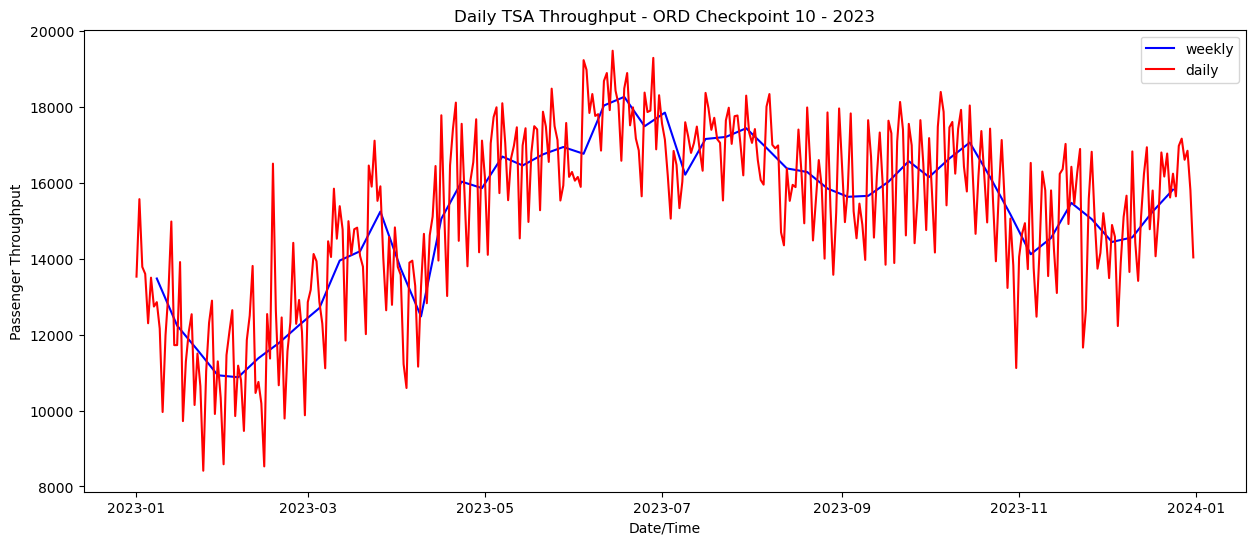

In [30]:
ord10_weekly = ord10_df.groupby(pd.Grouper(key='DateTime', freq='W'))['Total Passenger Throughput'].sum().iloc[1:-1]
plt.figure(figsize=(15, 6))
plt.plot(ord10_weekly.index, ord10_weekly/7, 'b-', label="weekly")
plt.plot(ord10_daily.index, ord10_daily, 'r-', label="daily")
plt.title('Daily TSA Throughput - ORD Checkpoint 10 - 2023')
plt.xlabel('Date/Time')
plt.ylabel('Passenger Throughput')
plt.legend()
plt.show()

Clearly, either daily or weekly data will be a useful feature to train a predictive model

Now let's compare the weekly throughput for multiple checkpoints in Chicago-O'Hare

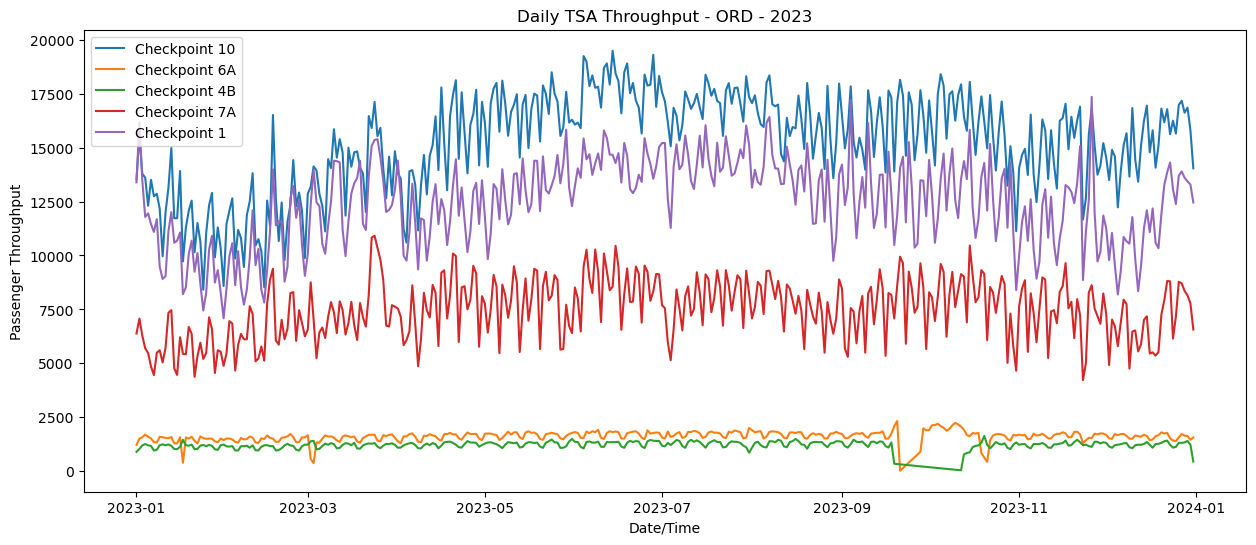

In [31]:
ord_df = tsa_data[tsa_data['Airport Code'] == 'ORD']
ord_daily_df = ord_df.groupby([pd.Grouper(key='DateTime', freq='D'), 'Checkpoint'])['Total Passenger Throughput'].sum()

plt.figure(figsize=(15, 6))
plt.plot(ord_daily_df[:,'10'].index, ord_daily_df[:,'10'], label="Checkpoint 10")
plt.plot(ord_daily_df[:,'6A'].index, ord_daily_df[:,'6A'], label="Checkpoint 6A")
plt.plot(ord_daily_df[:,'4B'].index, ord_daily_df[:,'4B'], label="Checkpoint 4B")
plt.plot(ord_daily_df[:,'7A'].index, ord_daily_df[:,'7A'], label="Checkpoint 7A")
plt.plot(ord_daily_df[:,'1'].index, ord_daily_df[:,'1'], label="Checkpoint 1")
plt.title('Daily TSA Throughput - ORD - 2023')
plt.xlabel('Date/Time')
plt.ylabel('Passenger Throughput')
plt.legend()
plt.show()

Notice that the top three checkpoints here (1, 7A, 10) seem to share mostly the same trends over time. This matches our intution that individual TSA checkpoints can essentially be ignored when focusing on trends in airport passenger volume over time.

The bottom two checkpoints (6A and 4B) are secondary checkpoints which only open up at certain times of day or during times of high volume. These entrances are typically used for TSA Precheck, Known Crewmember, or airport staff.

### Filter out Checkpoints

From here on, we will ignore TSA checkpoints and focus on each airport as a whole. To do so, we must sum over all checkpoints for each airport.

In [32]:
tsa_airport_data = tsa_data.groupby(["DateTime", "Airport Code", "Airport Name", "City", "State"], as_index=False)["Total Passenger Throughput"].sum()

## Chicago Airport

Now let's look at the daily passenger data for Chicago O'Hare airport as a whole

In [33]:
ord_data = tsa_airport_data[tsa_airport_data['Airport Code'] == 'ORD']

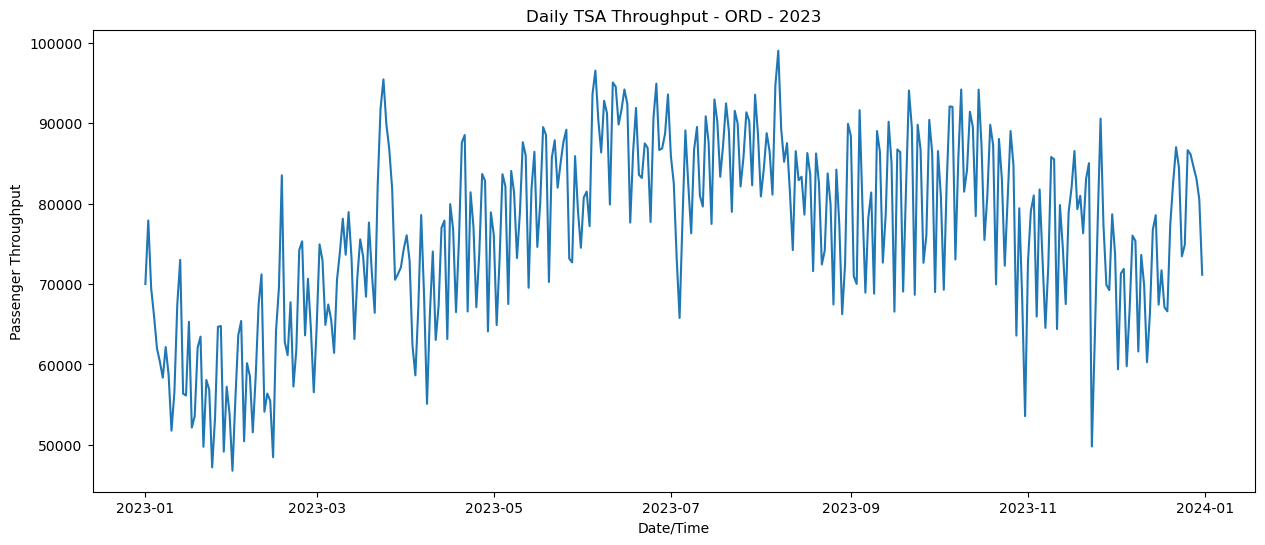

In [34]:
ord_daily = ord_data.groupby(pd.Grouper(key='DateTime', freq='D'))['Total Passenger Throughput'].sum()
plt.figure(figsize=(15, 6))
plt.plot(ord_daily.index, ord_daily)
plt.title('Daily TSA Throughput - ORD - 2023')
plt.xlabel('Date/Time')
plt.ylabel('Passenger Throughput')
plt.show()

This trend is pretty similar to the ones observed for the individual terminals.

Maybe we want to understand what times of day are the busiest. For that, we can look at each hour averaged over the whole year

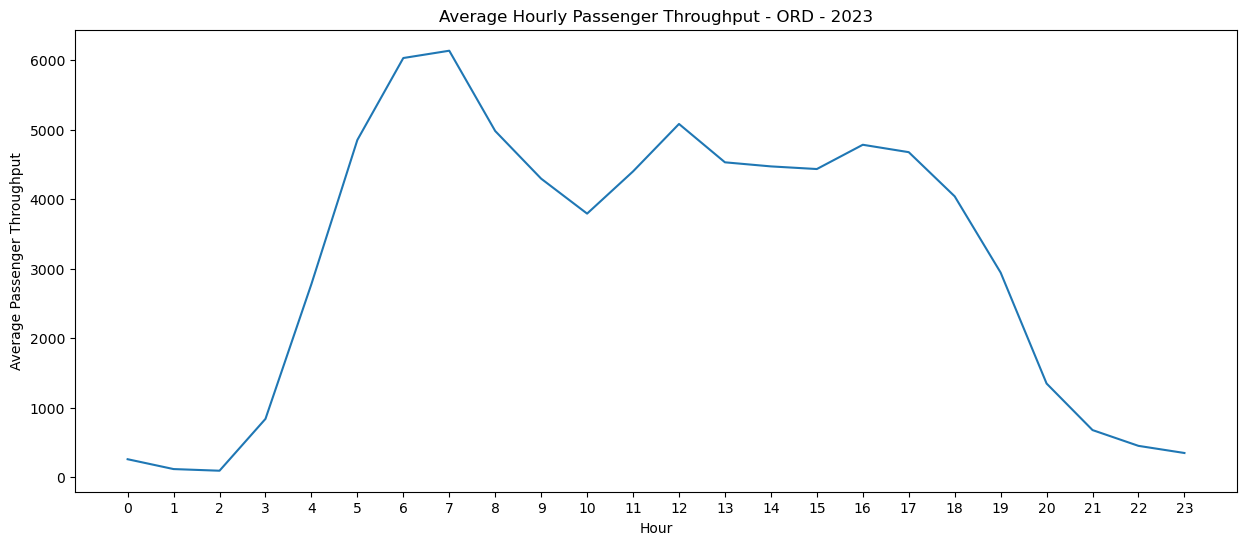

In [35]:
ord_data["Hour"] = ord_data["DateTime"].dt.hour
ord_hourly = ord_data.groupby('Hour')['Total Passenger Throughput'].mean().reset_index()
plt.figure(figsize=(15, 6))
plt.plot(ord_hourly['Hour'], ord_hourly['Total Passenger Throughput'])
plt.xlabel("Hour")
plt.ylabel("Average Passenger Throughput")
plt.title("Average Hourly Passenger Throughput - ORD - 2023")
plt.xticks(range(24))
plt.show()

As expected, the hours of 5AM to 5PM appear to be the busiest

We can do a similar plot for days of the week

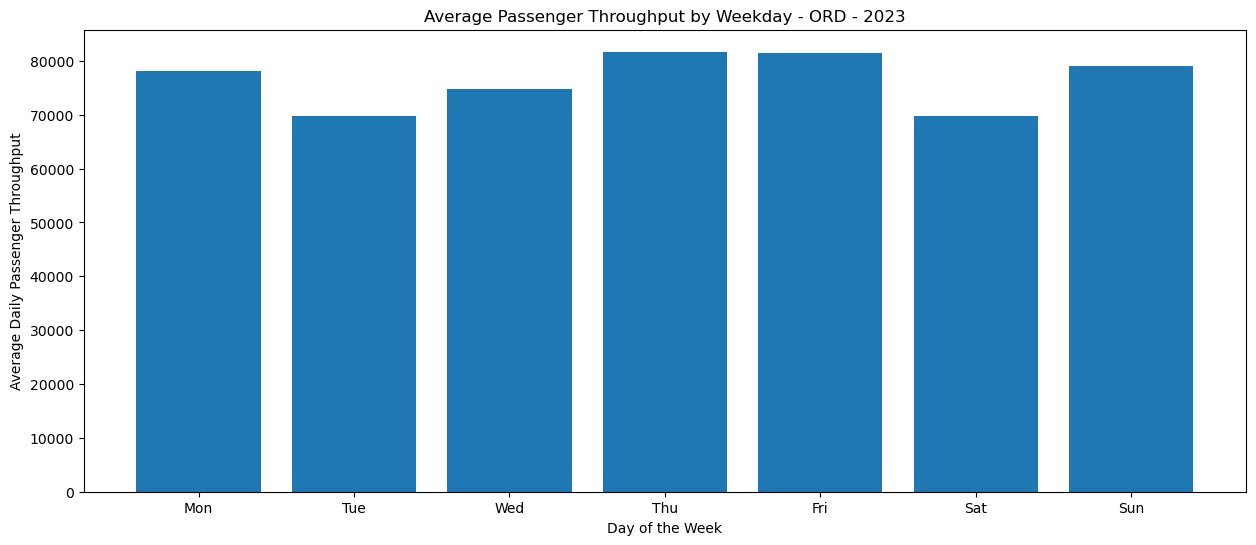

In [36]:
weekday_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
# Daily totals
ord_data["Date"] = ord_data["DateTime"].dt.date
ord_daily_totals = ord_data.groupby("Date")["Total Passenger Throughput"].sum().reset_index()
# Add weekday
ord_daily_totals["Weekday"] = pd.to_datetime(ord_daily_totals["Date"]).dt.weekday
# Average by weekday
ord_weekday_avg = ord_daily_totals.groupby('Weekday')['Total Passenger Throughput'].mean().reset_index()
plt.figure(figsize=(15, 6))
# plt.plot(ord_weekday_avg['day'], ord_weekday_avg['Total Passenger Throughput'])
plt.bar([weekday_names[i] for i in ord_weekday_avg["Weekday"]], ord_weekday_avg["Total Passenger Throughput"])
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily Passenger Throughput")
plt.title("Average Passenger Throughput by Weekday - ORD - 2023")
plt.show()

It appears the busiest days are Thursday and Friday and the least busy days are Tuesday and Saturday.

## Compare across Airports

Let's compare a few of the top airports in the country

In [37]:
# John F. Kennedy Intl. Airport - New York, NY
jfk_data = tsa_airport_data[tsa_airport_data['Airport Code'] == 'JFK']
jfk_daily = jfk_data.groupby(pd.Grouper(key='DateTime', freq='D'))['Total Passenger Throughput'].sum()
# Los Angeles Intl. Airport - Los Angeles, CA
lax_data = tsa_airport_data[tsa_airport_data['Airport Code'] == 'LAX']
lax_daily = lax_data.groupby(pd.Grouper(key='DateTime', freq='D'))['Total Passenger Throughput'].sum()
# Dallas-Ft Worth Intl. Airport - Dallas, TX
dfw_data = tsa_airport_data[tsa_airport_data['Airport Code'] == 'DFW']
dfw_daily = dfw_data.groupby(pd.Grouper(key='DateTime', freq='D'))['Total Passenger Throughput'].sum()

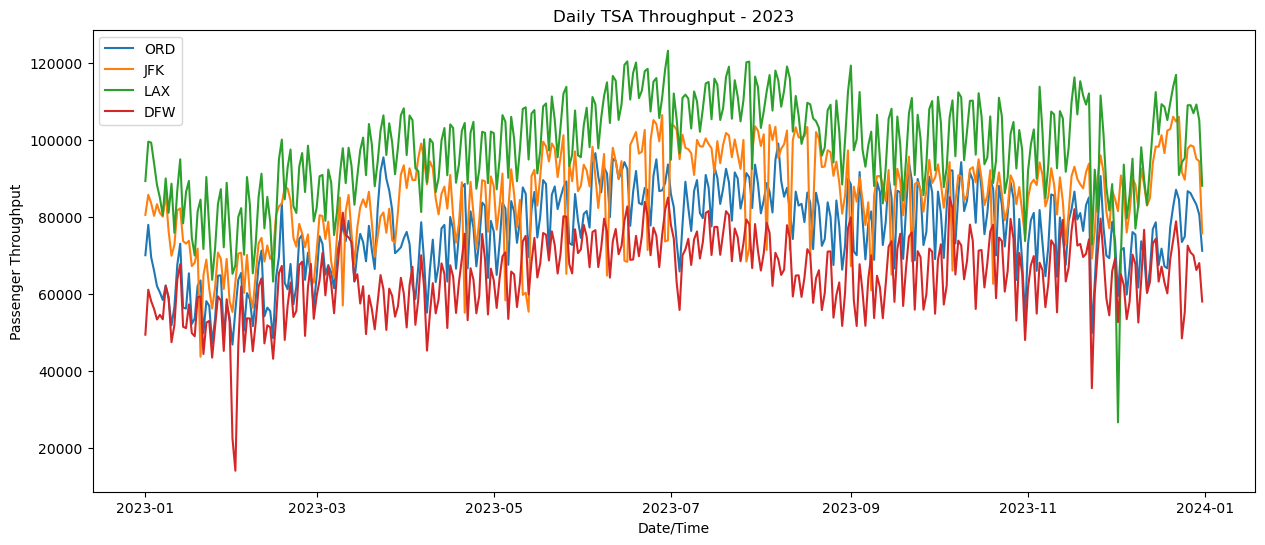

In [38]:
plt.figure(figsize=(15, 6))
plt.plot(ord_daily.index, ord_daily, label="ORD")
plt.plot(jfk_daily.index, jfk_daily, label="JFK")
plt.plot(lax_daily.index, lax_daily, label="LAX")
plt.plot(dfw_daily.index, dfw_daily, label="DFW")
plt.title('Daily TSA Throughput - 2023')
plt.xlabel('Date/Time')
plt.ylabel('Passenger Throughput')
plt.legend()
plt.show()

It looks like LAX is the winner! Also notice here that all of the major airports seem to follow similar seasonal trends.

Let's look at how the number of passengers is distributed by State:

In [39]:
tsa_airport_data.groupby('State')['Total Passenger Throughput'].sum().sort_values(ascending=False).head(10)

State
CA    109027462
FL    108760802
TX     74865361
NY     54839562
IL     36273580
GA     29521197
VA     28099564
NV     27485377
CO     25742991
NJ     25286151
Name: Total Passenger Throughput, dtype: int64

It looks like the top 5 states are California, Florida, Texas, New York, and Illinois. These make a lot of sense since these are all top populated US states containing the largest cities in the country.

Let's make a bar plot of the top 10 states:

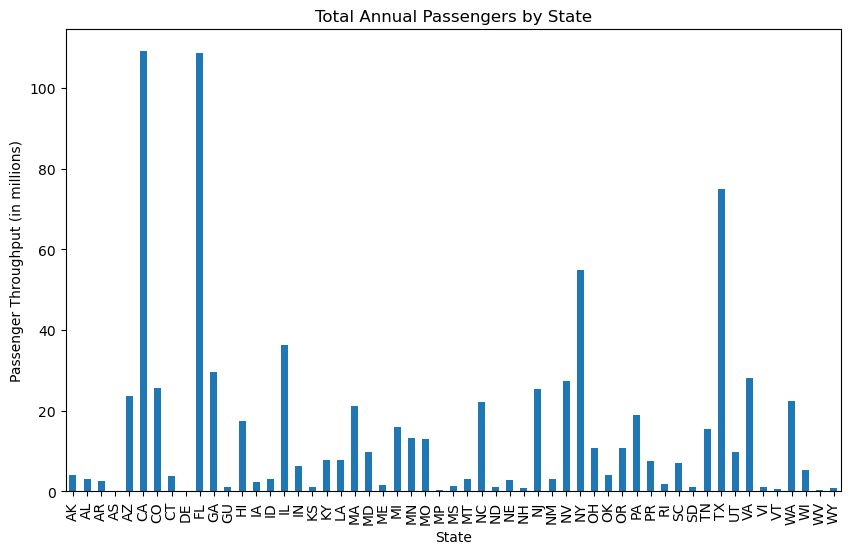

In [40]:
# Stacked bar per state
total_pax_by_state = tsa_airport_data.groupby('State')['Total Passenger Throughput'].sum()
(total_pax_by_state / 1e6).plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Total Annual Passengers by State")
plt.ylabel("Passenger Throughput (in millions)")
plt.show()

The states with the most travelers appear to be California, Florida, and Texas.

We can do the same thing with the top 20 cities

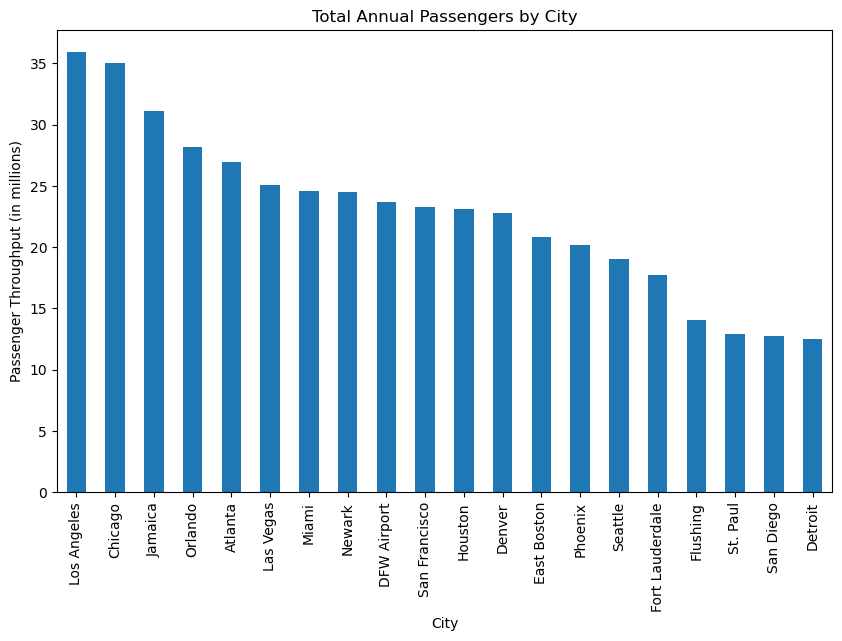

In [ ]:
# Stacked bar per state
total_pax_by_city = tsa_airport_data.groupby('City')['Total Passenger Throughput'].sum().sort_values(ascending=False).head(20)
(total_pax_by_city / 1e6).plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Total Annual Passengers by City")
plt.ylabel("Passenger Throughput (in millions)")
plt.show()
